# Exercise 4 : Linear Regression

## Objective
In the last Lab Exercise, you have identified and analyzed some of the most relevant numeric variables in this dataset,
which may affect the sale price of a house, and hence, will probably be most relevant in predicting “SalePrice”. In this
Lab Exercise, you will utilize some of those numeric variables to perform Linear Regression and predict “SalePrice”.
Typical steps to follow while building a supervised machine learning model on a given dataset:  



o Partition the labeled dataset into two random portions – 80% to Train the model and 20% to Test the model.  
o Fit the desired supervised machine learning model on the Train set to predict response using the predictors.  
o Predict response using the predictors on the Test set using the machine learning model fit on the Train data.  
o Check the Goodness of Fit of the model on Train set using R^2 and Prediction Accuracy on Test set using MSE.

---

### Preparation and Libraries Import
Import numpy, pandas, seaborn, matplotlib.

In [1]:
import numpy as np;
import pandas as pd;
import seaborn as sb
import matplotlib.pyplot as plt #we only need pyplot
sb.set() #Set the default seaborn style for graphics.

#### Linear Regression using Scikit-Learn

Scikit-Learn (`sklearn`) will be our de-facto Machine Learning library in Python.   
Import the `LinearRegression` model from `sklearn.linear_model`.

In [2]:
# Import essential models and functions from sk learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
#Import the train data set
trainData = pd.read_csv("train.csv")
trainData.head(n = 10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
print("Data type : ", type(trainData))
print("Data dims : ", trainData.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1460, 81)


In [5]:
print(trainData.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [6]:
trainData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Problem 1 : Predicting SalePrice using GrLivArea

---

Note : We observed during EDA that GrLivArea and SalePrice have a strong linear relationship with correlation 0.71.
In this problem, you will build a Linear Regression model to predict SalePrice using GrLivArea and judge its accuracy.

a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit a Linear Regression model on the Train
set to predict SalePrice using GrLivArea. Print the coefficients of your model and plot the regression line.  

## Import the Dataset


In [7]:
#Import the relevant data sets
#We are predicting SalePrice using GrLivArea
grLivArea = pd.DataFrame(trainData["GrLivArea"]) #Predictor
salePrice = pd.DataFrame(trainData["SalePrice"]) #Response

#Split the Dataset into Train and Test
grLivArea_train, grLivArea_test, salePrice_train, salePrice_test = train_test_split(grLivArea,salePrice, test_size = 0.20)

### Basic Exploration

In [8]:
grLivArea_train.describe()

,GrLivArea
count,1168.000000
mean,1517.631849
std,530.666131
min,334.000000
25%,1127.500000
50%,1470.500000
75%,1780.250000
max,5642.000000


In [9]:
salePrice_train.describe()

,SalePrice
count,1168.000000
mean,181004.956336
std,80802.323854
min,34900.000000
25%,129000.000000
50%,163000.000000
75%,214625.000000
max,755000.000000


<AxesSubplot:>

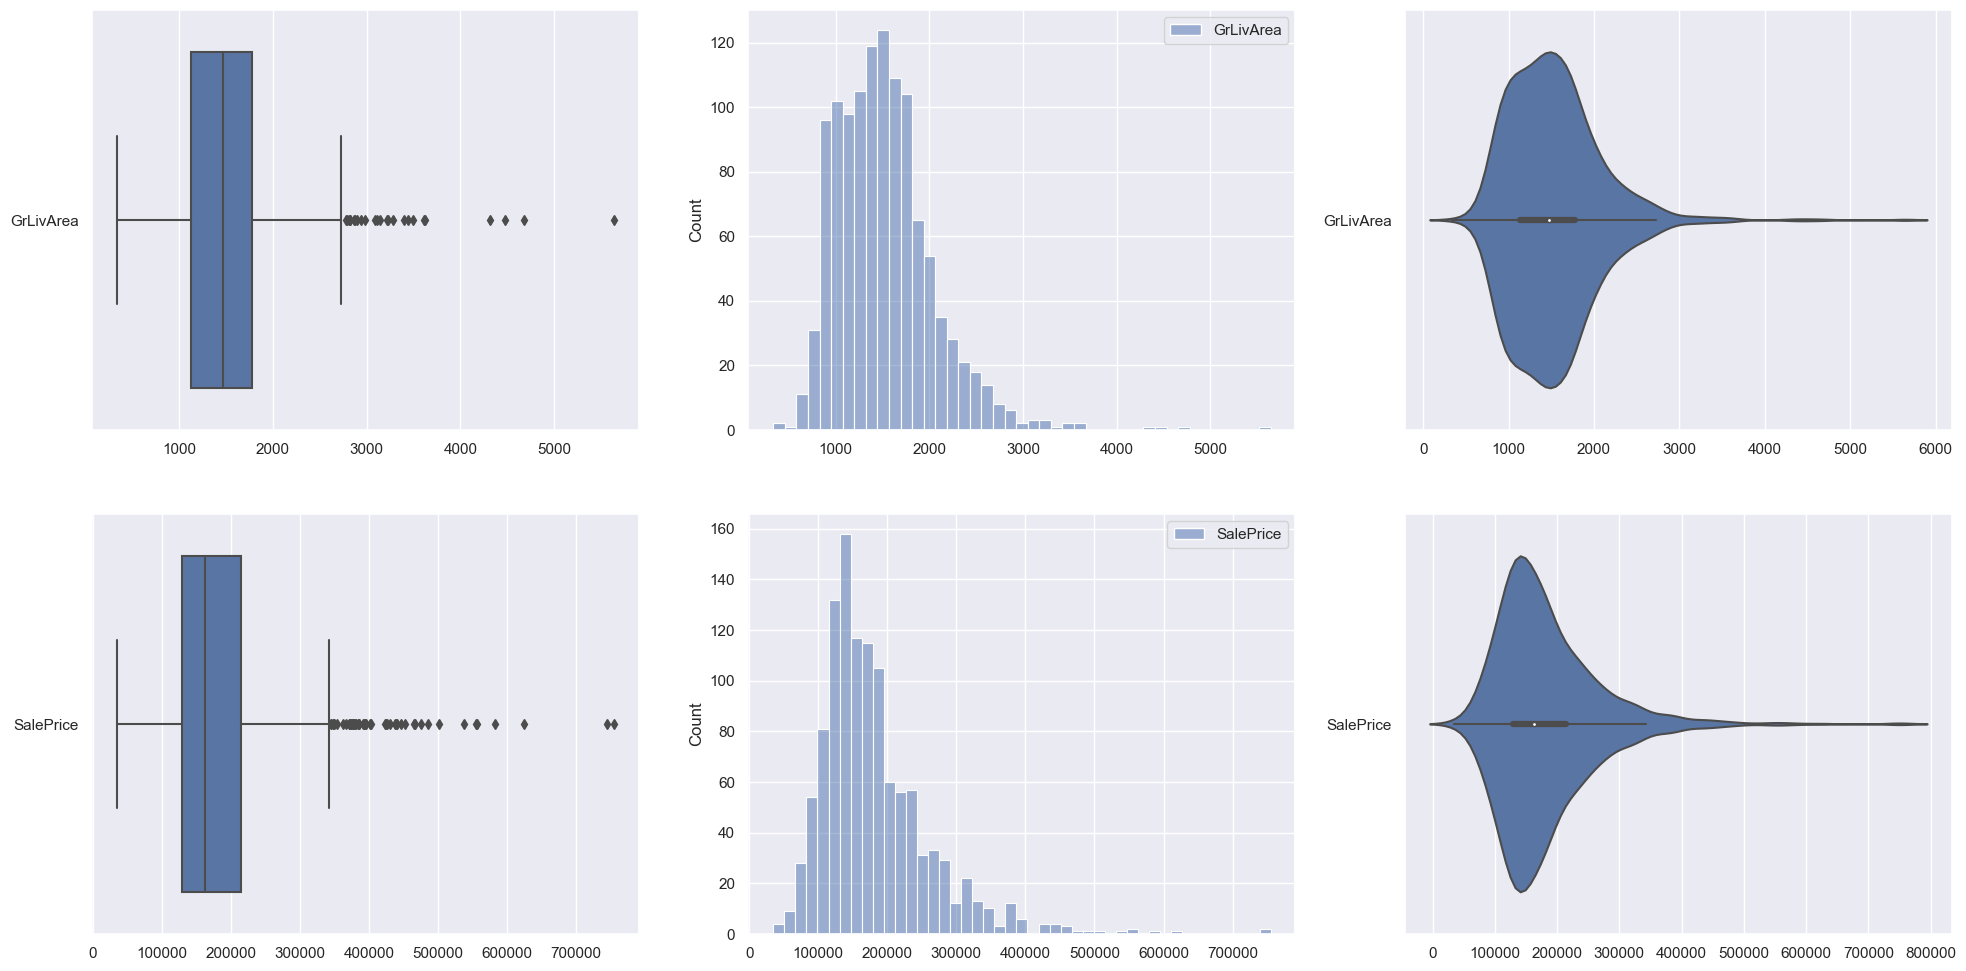

In [10]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP Train
sb.boxplot(data = grLivArea_train, orient = "h", ax = axes[0,0])
sb.histplot(data = grLivArea_train, ax = axes[0,1])
sb.violinplot(data = grLivArea_train, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Total Train
sb.boxplot(data = salePrice_train, orient = "h", ax = axes[1,0])
sb.histplot(data = salePrice_train, ax = axes[1,1])
sb.violinplot(data = salePrice_train, orient = "h", ax = axes[1,2])

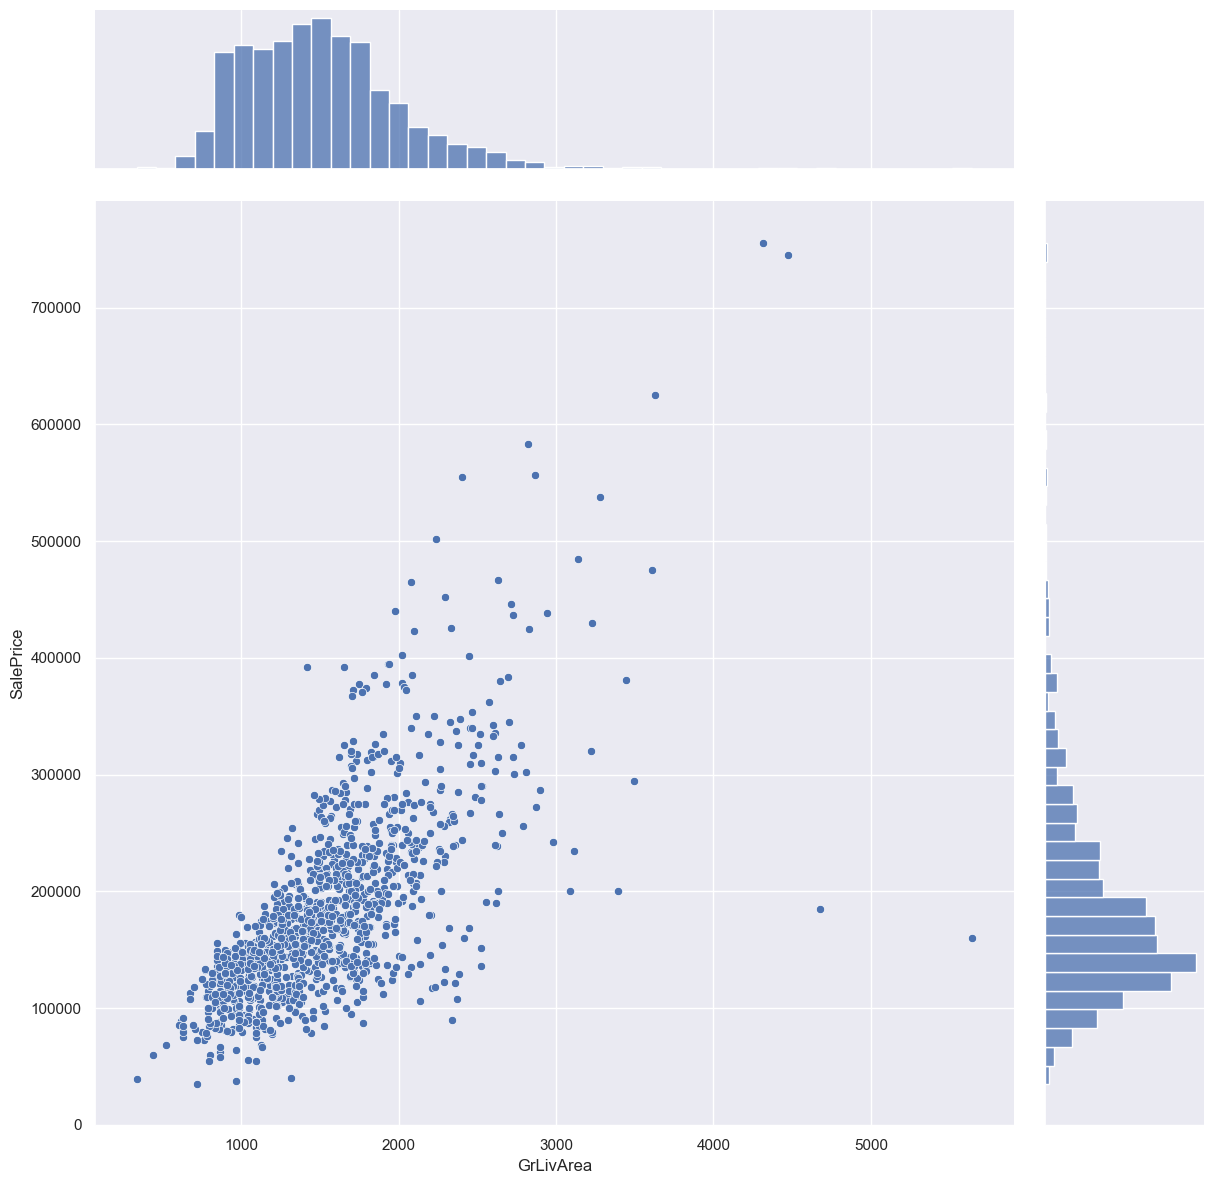

In [11]:
# Create a joint dataframe by concatenating the two variables
trainDF = pd.concat([grLivArea_train, salePrice_train], axis = 1).reindex(salePrice_train.index)

# Jointplot of Total Train against HP Train
sb.jointplot(data = trainDF, x = "GrLivArea", y = "SalePrice", height = 12)

<AxesSubplot:>

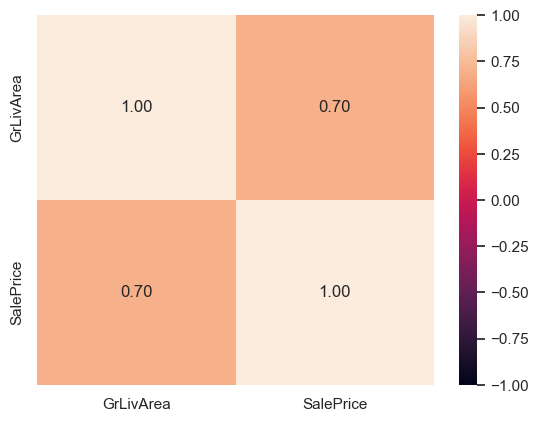

In [12]:
# Calculate the correlation between the two columns/variables
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

So far, the results are about the same as from last week when conducting our EDA this week. Let us plot the regression line now.

Intercept 	: b =  [18615.80589685]
Coefficients 	: a =  [[107.00167535]]


Text(0, 0.5, 'SalePrice')

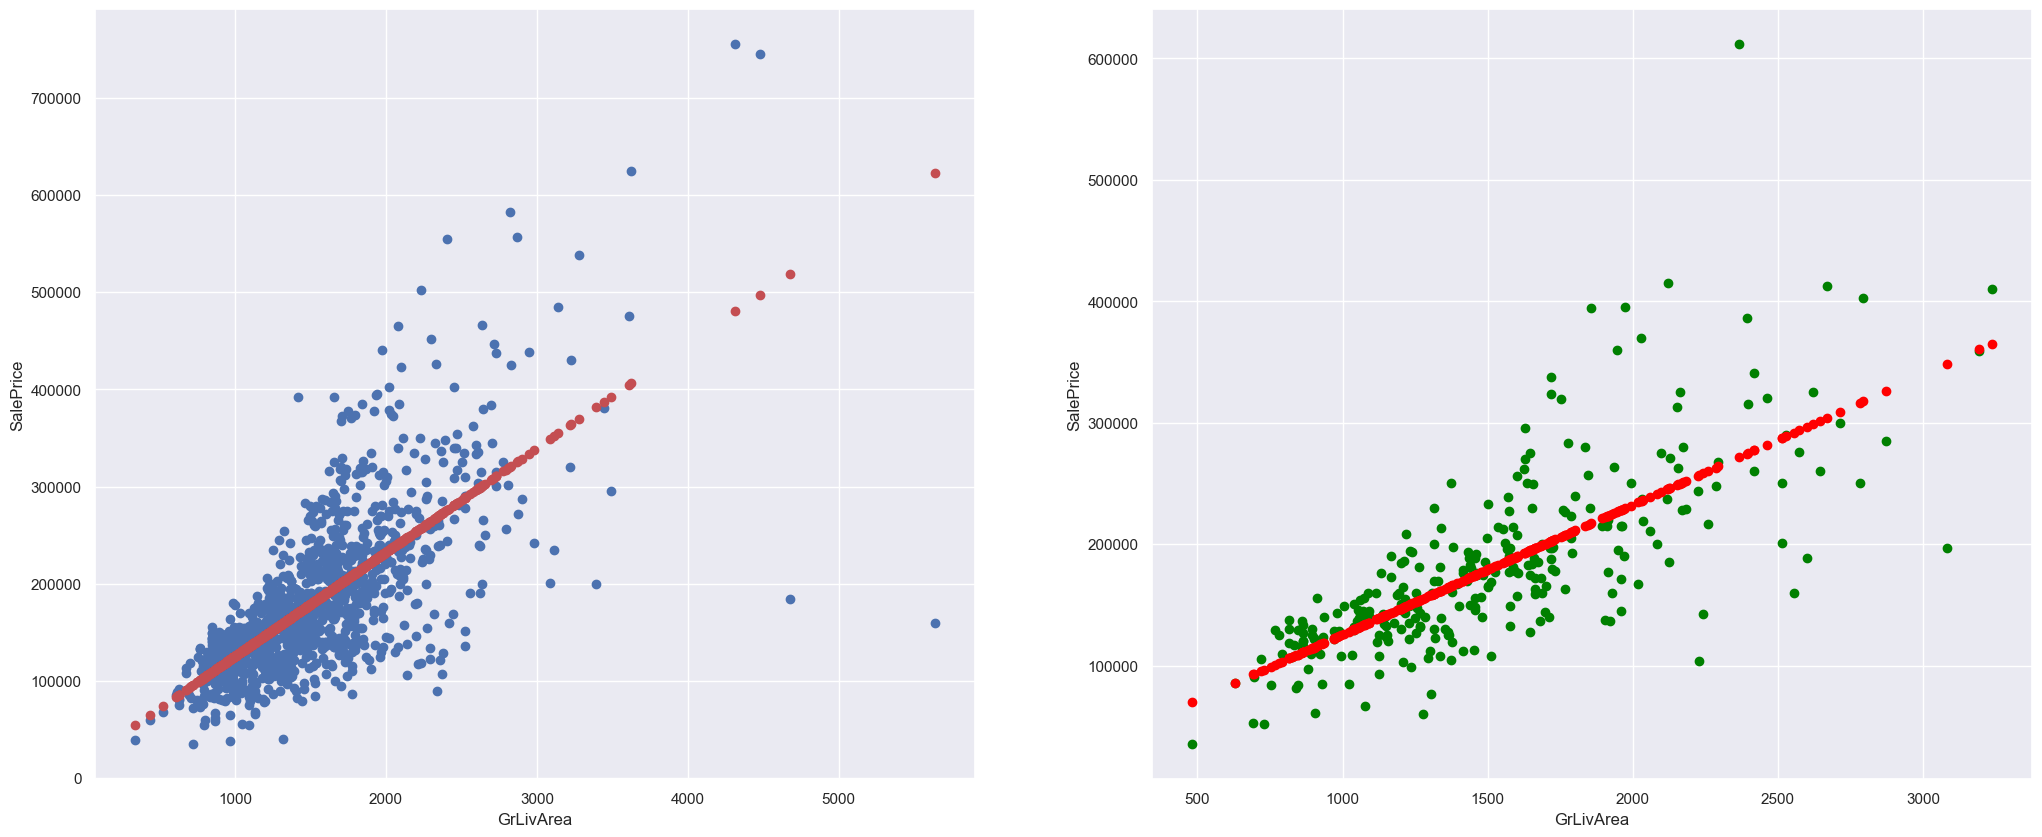

In [13]:
#Create a Linear Regression object
linreg = LinearRegression()
#Train the Linear Regression model
linreg.fit(grLivArea_train, salePrice_train)

#Coefficients of the Linear Regression line
print("Intercept \t: b = ", linreg.intercept_)
print("Coefficients \t: a = ",linreg.coef_)

#Attempt to predict SalePrice using GrLivArea
salePrice_train_pred = linreg.predict(grLivArea_train)
#Predict The SalePrice corresponding to the GrLivAreaTest
salePrice_test_pred = linreg.predict(grLivArea_test)

# Plot the Linear Regression Line
f, axes = plt.subplots(1,2, figsize=(25,10))
#
axes[0].scatter(grLivArea_train, salePrice_train)
axes[0].scatter(grLivArea_train, salePrice_train_pred, color = "r")
axes[0].set_xlabel("GrLivArea")
axes[0].set_ylabel("SalePrice")

# Plot the Predictions
axes[1].scatter(grLivArea_test, salePrice_test,color = "green")
axes[1].scatter(grLivArea_test, salePrice_test_pred, color = "red")
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
axes[1].set_xlabel("GrLivArea")
axes[1].set_ylabel("SalePrice")

# #Plot the Linear Regression Line
# f = plt.figure(figsize = (16,8))
# #Scatter plot between our train values
# plt.scatter(grLivArea_train, salePrice_train)
# #Then plot the line on where we predicted the sale price to be using grlivarea
# #Then do another scatter plot of train and the predicted price on y axis
# plt.scatter(grLivArea_train, salePrice_train_pred, color = "r")
# plt.show()

### Linear Regression Plot with a solid line:

Text(0, 0.5, 'SalePrice')

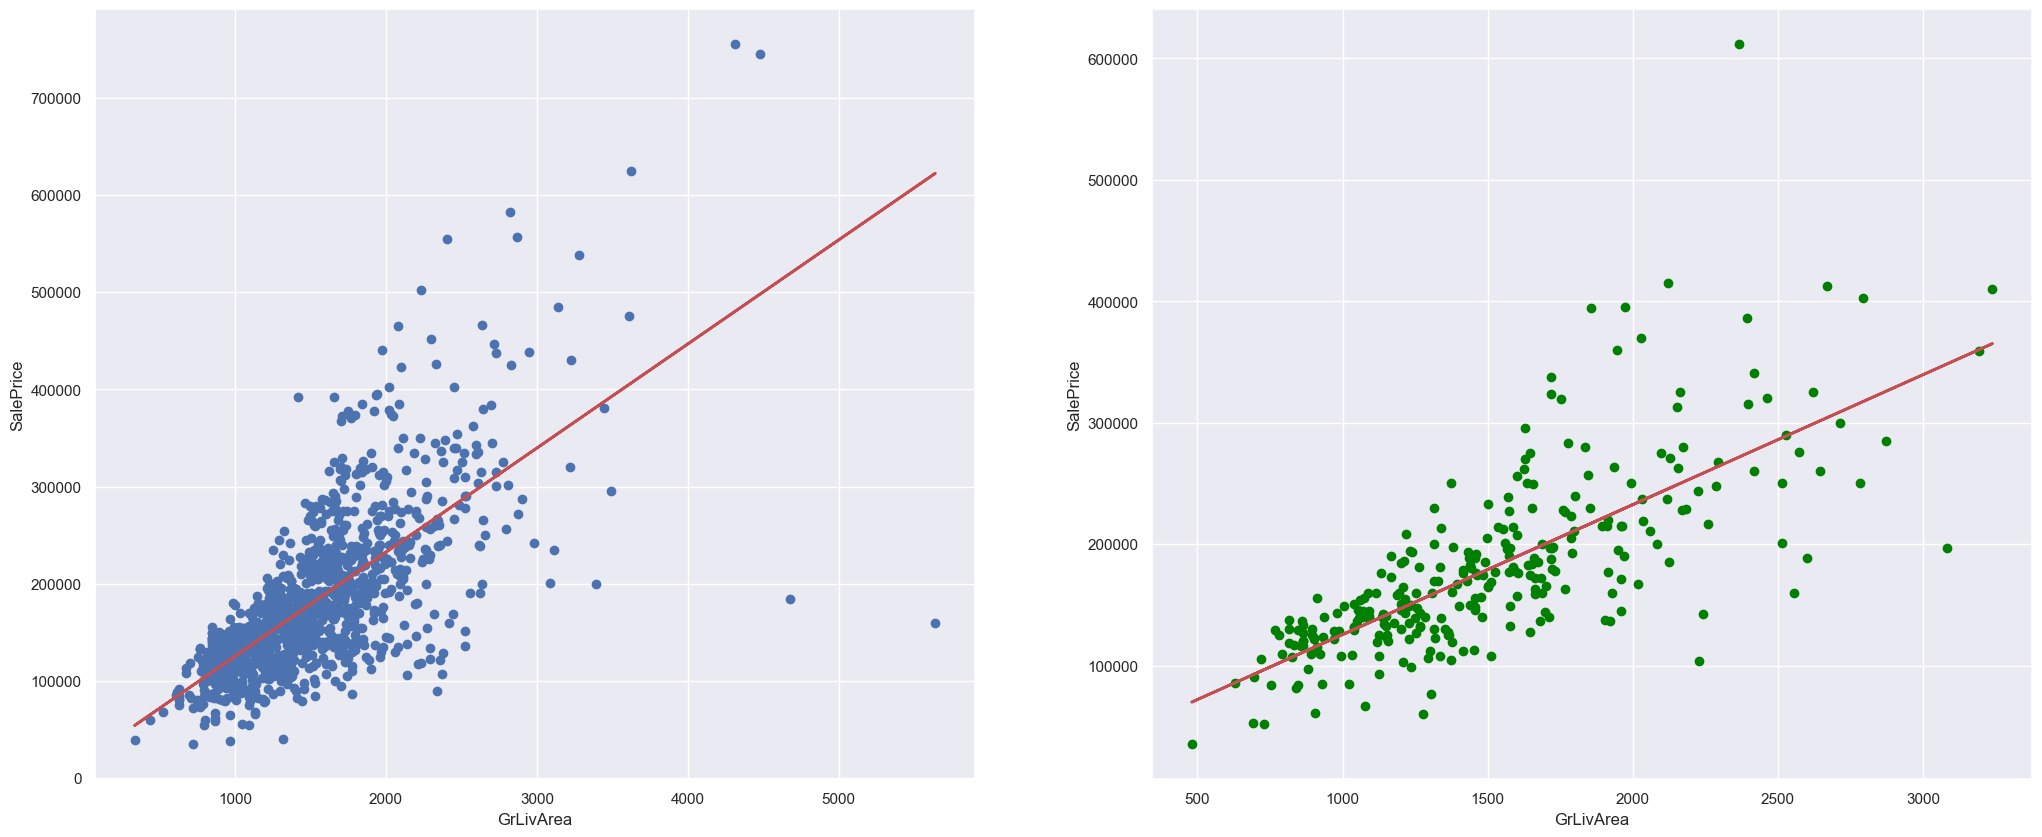

In [14]:
# f = plt.figure(figsize = (16,8))
# #Scatter plot between our train values
# plt.scatter(grLivArea_train, salePrice_train)
# #Then plot the line on where we predicted the sale price to be using grlivarea

# Plot the Linear Regression Line
f, axes = plt.subplots(1,2, figsize=(25,10))
#
axes[0].scatter(grLivArea_train, salePrice_train)
axes[0].plot(grLivArea_train,salePrice_train_pred, 'r-', linewidth = 2)
axes[0].set_xlabel("GrLivArea")
axes[0].set_ylabel("SalePrice")

# Plot the Predictions
axes[1].scatter(grLivArea_test, salePrice_test,color = "green")
axes[1].plot(grLivArea_test,salePrice_test_pred, 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
axes[1].set_xlabel("GrLivArea")
axes[1].set_ylabel("SalePrice")



b) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set. Print the metrics for Goodness of Fit and Prediction Accuracy that you think are appropriate in each scenario.

We can test the Goodness of Fit of the model using Explained Variance and Mean Squared Error.

Test the Linear Regression model `linreg` using the Test Set.   

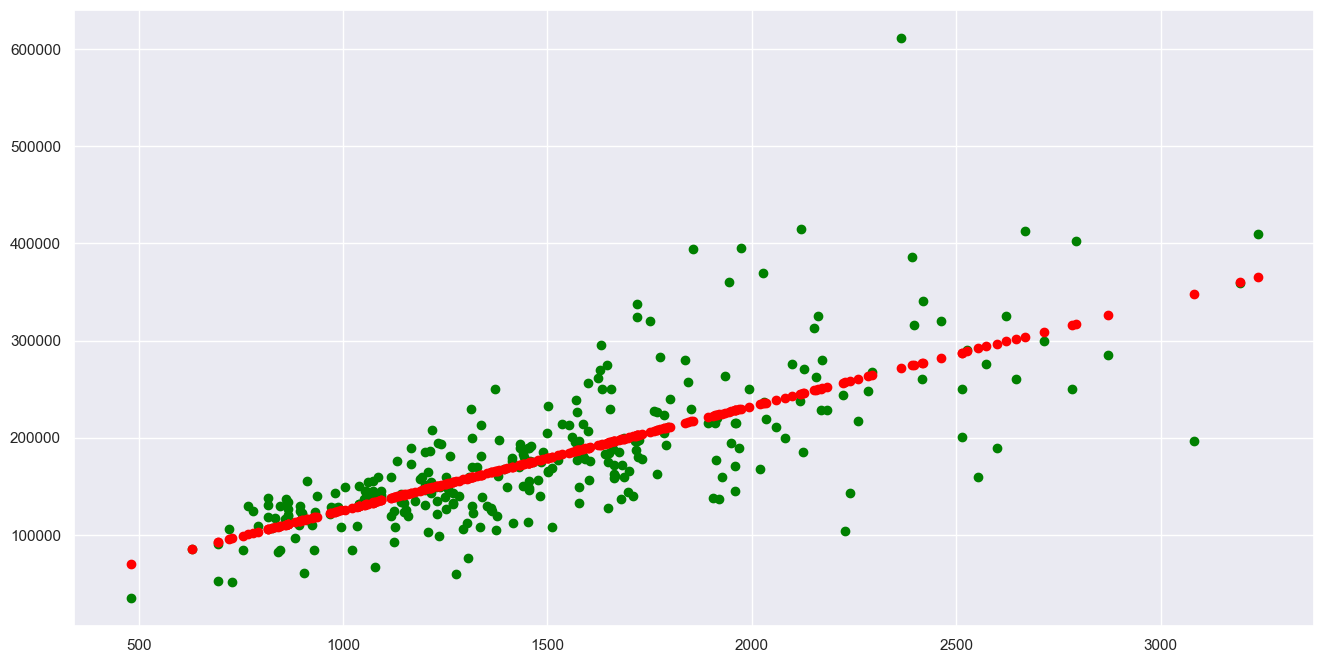

In [15]:
#Plot the # Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(grLivArea_test, salePrice_test, color = "green")
plt.scatter(grLivArea_test, salePrice_test_pred, color = "red")
plt.show()

Check how good the predictions are on the Test Set.    
Metrics : Explained Variance and Mean Squared Error.

To check Goodness of Fit of the model on the Train Set, we will use Explained Variance  
To check Prediction Accuracy on the Test Set, we can use Mean Squared Error(MSE) and Root Mean Squared Error(RMSE)

In [16]:
#Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean SQuared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

#Check Goodness of Fit on Train Data using Explained Variance and MSE
print("Goodness of Fit of Model") #\t[{0},{1}]".format("GrLivArea_Test", "SalePrice_Test"))
# Explained Variance (R^2)
salePriceExplainedVariance = linreg.score(grLivArea_train, salePrice_train)
print("Explained Variance (R^2) \t:", salePriceExplainedVariance)

#Calculate MSE and print
mse = mean_squared_error(salePrice_test,salePrice_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))


Goodness of Fit of Model
Explained Variance (R^2) 	: 0.49382854960887124
Mean Squared Error (MSE) 	: 2491461514.109415
Root Mean Squared Error (RMSE) 	: 49914.54211058552


--- 

## Problem 2 : Predicting SalePrice using Other Variables

Following the steps from the previous problem, build two new uni-variate Linear Regression models to predict SalePrice
using the variables TotalBsmtSF and GarageArea, individually. Justify which of the three models is the best in this case.


Hints and Pointers  
o Same as Problem 1, just on other variables. You can compare models using the metrics you are printing anyway.  
o Optional: You may think of writing a simple Python function to do regression on some variables in a given dataset.

[GarageArea,SalePrice] Data:
Intercept 			: b =  [70685.78744802]
Coefficients 			: a =  [[233.13357564]]
Explained Variance (R^2) 	: 0.3993738552075017

[TotalBsmtSF,SalePrice] Data:
Intercept 			: b =  [65860.80211428]
Coefficients 			: a =  [[108.83094273]]
Explained Variance (R^2) 	: 0.36775239592670717



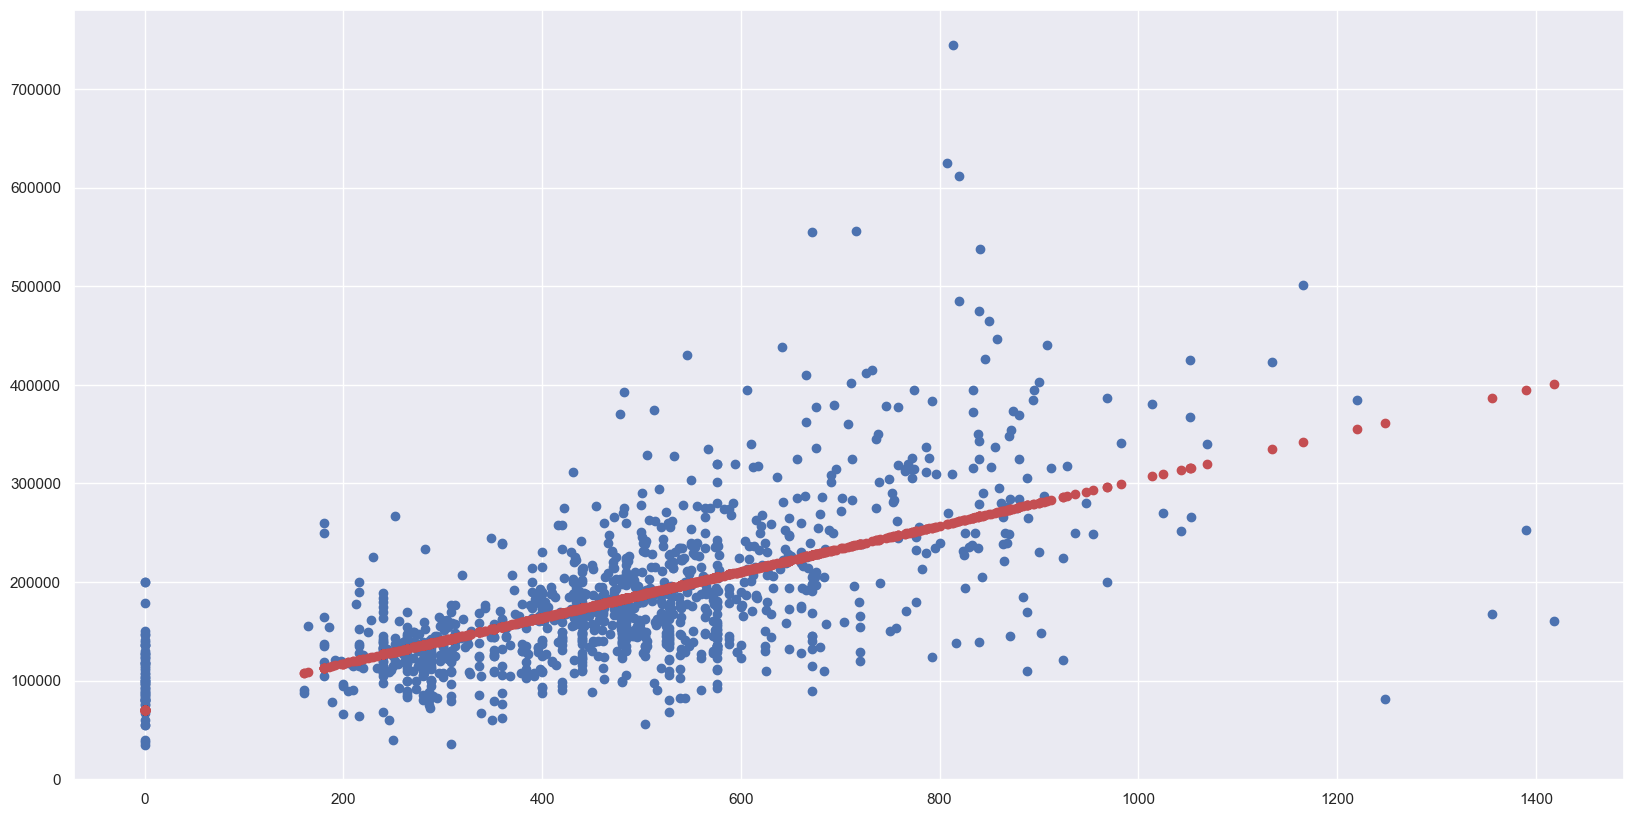

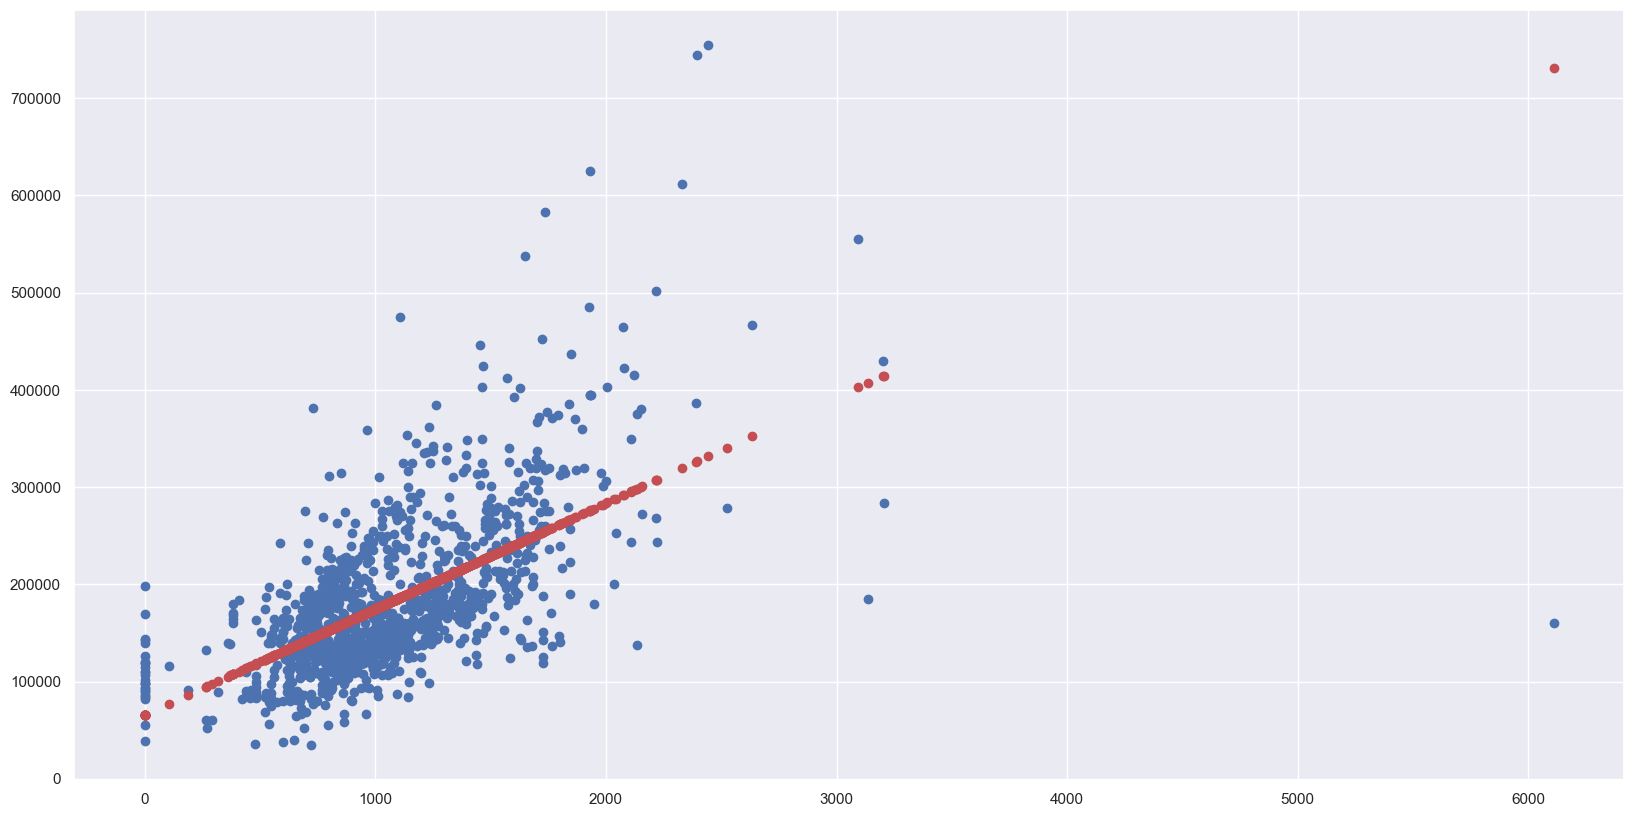

In [17]:
#Define a regression func to easily calculate regression among two variables
def calcRegression(predictor, response, testSize = 0.2, solidLine = False):

    #Get the appropriate data from train and put them in DF!
    #Check if the inputs are valid
    if (predictor is None or response is None):
        print("Invalid input into regression function")
        return
     
    #Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(predictor,response, test_size = testSize)

    #Then calculate the linear regression using train data
    linreg = LinearRegression();
    linreg.fit(X_train, y_train);

    #Print Coefficients of the Linear Regression line
    print("Intercept \t\t\t: b = ", linreg.intercept_)
    print("Coefficients \t\t\t: a = ",linreg.coef_)

    explainedVariance = linreg.score(X_train, y_train)
    # Explained Variance (R^2)
    print("Explained Variance (R^2) \t:", explainedVariance)

    #Predict the values corresponding to the predictor
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    #Plot the regression line
    f = plt.figure(figsize = (20,10))
    plt.scatter(X_train, y_train)
    if solidLine:
        plt.plot(X_train,y_train_pred,'r-', linewidth = 2)
    else:
        plt.scatter(X_train, y_train_pred, color = "r")
    print()

    #Then return a tuple of the predictions
    return (y_test, y_train_pred, y_test_pred, explainedVariance)


garageArea = pd.DataFrame(trainData["GarageArea"])
totalBsmtSF = pd.DataFrame(trainData["TotalBsmtSF"])
#Calculate the regression values of the two other variables "GarageArea" and "SalePrice"

print("[{0},{1}] Data:".format("GarageArea", "SalePrice"))
garageAreaPricePred = calcRegression(garageArea,salePrice)

print("[{0},{1}] Data:".format("TotalBsmtSF", "SalePrice"))
totalBsmtSFPricePred = calcRegression(totalBsmtSF, salePrice)

### Define a Goodness of Fit Function

In [18]:
#Pass in the tuple of the data we used to calculate our regression to maintain consitency
#(y_test, y_train_pred, y_test_pred)
# [0] y_test
# [1], y_train_pred
# [2], y_test_pred
# [3], explainedVariance
def goodnessOfFit(data):
    mse = mean_squared_error(data[0], data[2])
    print("Explained Variance (R^2) \t:", data[3])
    print("Mean Squared Error (MSE) \t:", mse)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
    print("")
    
#Comparison of all three models
print("GrLivArea <-> SalePrice")
goodnessOfFit((salePrice_test, salePrice_train_pred, salePrice_test_pred, salePriceExplainedVariance))
print("GarageArea <-> SalePrice")
goodnessOfFit(garageAreaPricePred)
print("TotalBsmtSF <-> SalePrice")
goodnessOfFit(totalBsmtSFPricePred)

GrLivArea <-> SalePrice
Explained Variance (R^2) 	: 0.49382854960887124
Mean Squared Error (MSE) 	: 2491461514.109415
Root Mean Squared Error (RMSE) 	: 49914.54211058552

GarageArea <-> SalePrice
Explained Variance (R^2) 	: 0.3993738552075017
Mean Squared Error (MSE) 	: 4528077802.257768
Root Mean Squared Error (RMSE) 	: 67290.99347058094

TotalBsmtSF <-> SalePrice
Explained Variance (R^2) 	: 0.36775239592670717
Mean Squared Error (MSE) 	: 3356473057.459912
Root Mean Squared Error (RMSE) 	: 57935.07622727282



Judging from the Root Mean Squared Errors of the three variables <b>GrLivArea</b>, <b>GarageArea</b>, <b>TotalBsmtSF</b>, the root mean squared error of <b>GrLivArea</b> is the lowest in general. Hence the model between <b>GrLivArea</b> and <b>SalePrice</b> is the best to use in this case.

--- 
# Problem 3 : Refining the Models to Predict SalePrice

In this problem, you will consider finer details of the dataset and the variables to refine the model to predict SalePrice.  

(a) Find the houses (rows) that are “outliers” for GrLivArea and/or SalePrice. This means outliers for GrLivArea
UNION outliers for SalePrice in a set notation. Remove all these “outliers” from the dataset so that it is clean.

In [19]:
def findOutlierBounds(df):
    #Get the q1 and q3 datas to find out the 25% and 75% range, then calculate inter quartile range and then find out whiskers.
    #Then count how many points lie outside of this range.
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    #Interquartile
    iqr = q3 - q1
    #Calculate whiskers
    leftWhisker = q1 - (1.5 * iqr)
    rightWhisker = q3 + (1.5 * iqr)
    #Print out the bounds
    print("Lower Bounds: ", leftWhisker[0])
    print("Upper Bounds: ", rightWhisker[0])
    return (leftWhisker[0], rightWhisker[0])

#Find the bounds of each salePrice's df
salePriceBounds = findOutlierBounds(salePrice)
grLivAreaBounds = findOutlierBounds(grLivArea)

#Filter the df using the comparisons and get rid of the outliers
filteredDF = trainData[(trainData["SalePrice"] >= salePriceBounds[0]) & (trainData["SalePrice"] <= salePriceBounds[1]) 
                    & (trainData["GrLivArea"] >= grLivAreaBounds[0]) & (trainData["GrLivArea"] <= grLivAreaBounds[1])]

#Using the filtered results, we then reassign to get the cleaned data frame
cleanedSalePrice = pd.DataFrame(filteredDF["SalePrice"])
cleanedGrLivArea = pd.DataFrame(filteredDF["GrLivArea"])

Lower Bounds:  3937.5
Upper Bounds:  340037.5
Lower Bounds:  158.625
Upper Bounds:  2747.625


(b) In the outlier-free dataset, create Train and Test sets with an 80:20 ratio, and fit a Linear Regression model on
the Train set to predict SalePrice using GrLivArea. Print the model coefficients and plot the regression line.


[CleanedGrLivArea,CleanedSalePrice] Data:
Intercept 			: b =  [35625.4972769]
Coefficients 			: a =  [[91.23835948]]
Explained Variance (R^2) 	: 0.4801091489558499



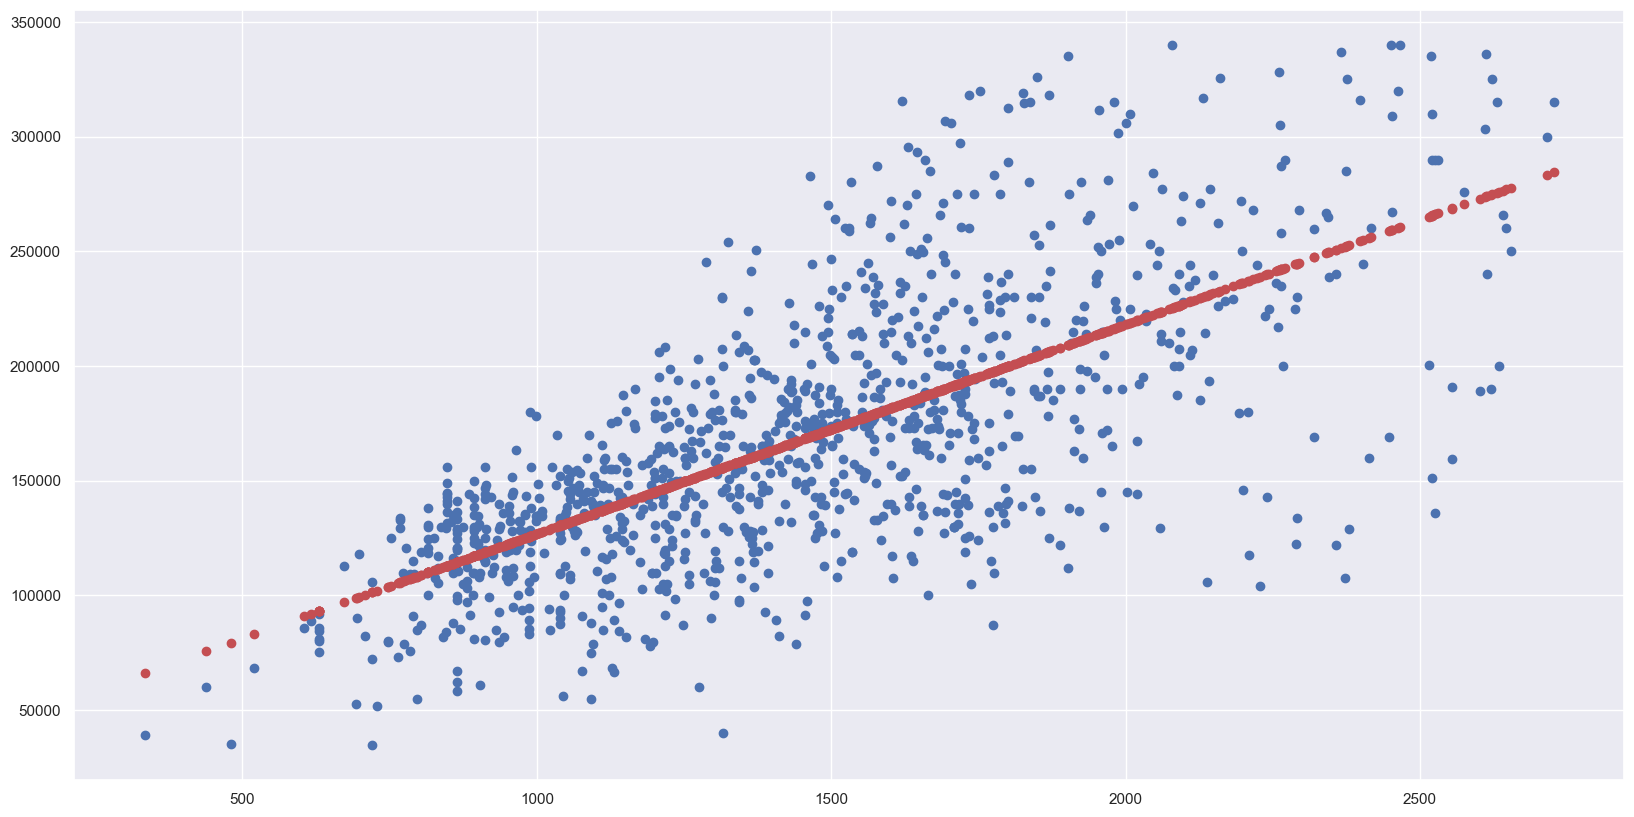

In [20]:
print("[{0},{1}] Data:".format("CleanedGrLivArea", "CleanedSalePrice"))
cleanedGrLivAreaPricePred = calcRegression(cleanedGrLivArea, cleanedSalePrice)

(c) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set.
Do you think this model is better than the model obtained in Problem 1 for the same variables? Briefly justify.

In [21]:
#Compare the values of both the model in problem 1 and the items in this new cleaned set
print("GrLivArea <-> SalePrice (Model 1)")
goodnessOfFit((salePrice_test, salePrice_train_pred, salePrice_test_pred, salePriceExplainedVariance))
print("cleanedGrLivArea <-> CleanedSalePrice")
goodnessOfFit(cleanedGrLivAreaPricePred)

GrLivArea <-> SalePrice (Model 1)
Explained Variance (R^2) 	: 0.49382854960887124
Mean Squared Error (MSE) 	: 2491461514.109415
Root Mean Squared Error (RMSE) 	: 49914.54211058552

cleanedGrLivArea <-> CleanedSalePrice
Explained Variance (R^2) 	: 0.4801091489558499
Mean Squared Error (MSE) 	: 2128980735.1932259
Root Mean Squared Error (RMSE) 	: 46140.87921998481



Comparing the current cleaned price data to the model we acquired in model 1, the explained variance on the cleaned sale price model is slightly lower than the initial model in Question 1. However, the Root Mean Squared Error after cleaning the model of outliers is significantly lower than the model in Question 1. Hence the cleaned model is better.